In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
import sys

sys.path.append("../src")
from model import make_generator

In [2]:
images = glob.glob("../datasets/celeb/high_resolution/*.JPEG")

In [3]:
model = make_generator()
model.load_weights("../checkpoint/generator")
model.build(input_shape=(None, 32, 32, 3))
model.summary()

2021-08-24 23:03:59.163258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-24 23:03:59.201444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-24 23:03:59.201747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-24 23:03:59.202367: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        15616     
_________________________________________________________________
p_re_lu (PReLU)              (None, 32, 32, 64)        65536     
_________________________________________________________________
residual_block (ResidualBloc (None, 32, 32, 64)        736704    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 256)       147712    
_________________________________________________________________
pixel_shuffler (PixelShuffle (None, 64, 64, 64)        0         
_________________________________________________________________
p_re_lu_6 (PReLU)            (None, 64, 64, 64)        262144    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 256)       1

In [4]:
image = Image.open("../datasets/celeb/test/000003.jpg")
original = Image.open("../datasets/celeb/test/high_resolution/000003.jpg")

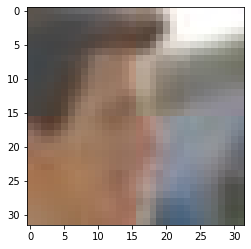

In [5]:
plt.imshow(image)
plt.show()

In [6]:
srgan = model(((np.array(image) - 122.5) / 255.0).reshape(1, 32, 32, 3), training=False)

2021-08-24 23:04:08.866396: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202
2021-08-24 23:04:09.642155: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-08-24 23:04:09.642430: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-08-24 23:04:09.642443: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2021-08-24 23:04:09.642734: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-08-24 23:04:09.642768: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


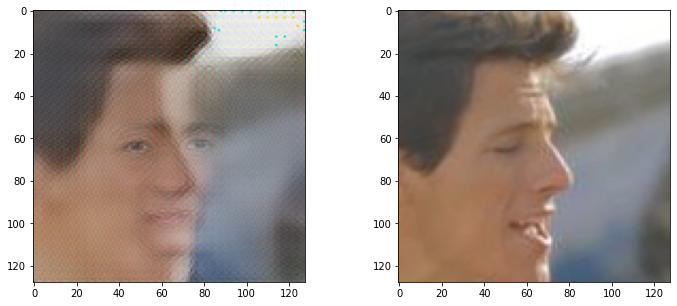

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.imshow((srgan*255 + 122.5).numpy()[0].astype(np.uint8))
ax = fig.add_subplot(122)
ax.imshow(original)
plt.show()

In [8]:
image = Image.open("../datasets/celeb/test/000001.jpg")
original = Image.open("../datasets/celeb/test/high_resolution/000001.jpg")

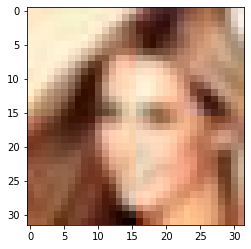

In [9]:
plt.imshow(image)
plt.show()

In [21]:
srgan = model(((np.array(image) - 122.5) / 255.0).reshape(1, 32, 32, 3), training=False)

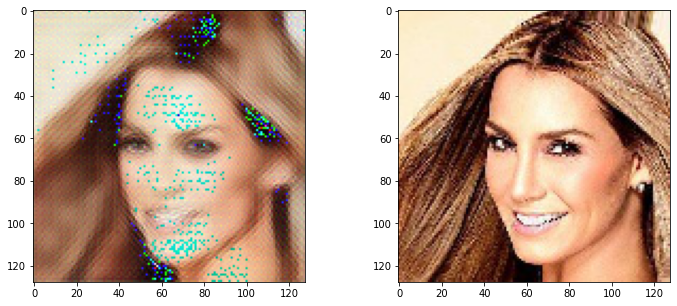

In [22]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.imshow((srgan*255 + 122.5).numpy()[0].astype(np.uint8))
ax = fig.add_subplot(122)
ax.imshow(original)
plt.show()

In [19]:
random = (np.random.random((1, 32, 32, 3)) * 255).astype(np.uint8)
srgan = model((random.astype(np.float16) - 122.5) / 255.0, training=False)

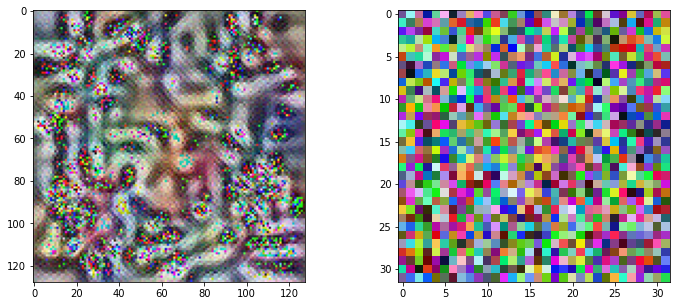

In [20]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.imshow((srgan*255 + 122.5).numpy()[0].astype(np.uint8))
ax = fig.add_subplot(122)
ax.imshow(random[0])
plt.show()

In [17]:
zeros = (np.zeros((1, 32, 32, 3)) * 255).astype(np.uint8)
srgan = model((zeros.astype(np.float16) - 122.5) / 255.0, training=False)

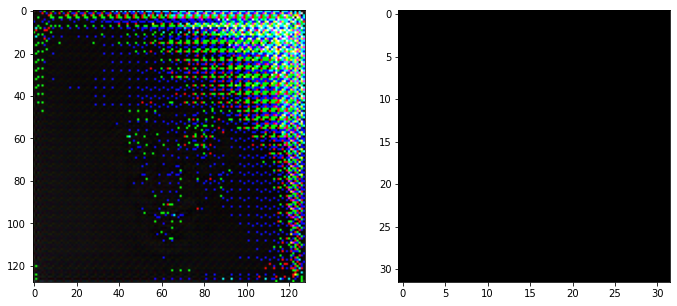

In [18]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121)
ax.imshow((srgan*255 + 122.5).numpy()[0].astype(np.uint8))
ax = fig.add_subplot(122)
ax.imshow(zeros[0])
plt.show()